# Rating detection

1. Read dataset and make it in proper format.
2. Encode labels
3. Convert all cases to lower
4. Remove punctuations
5. Remove Stopwords
6. Check stats of messages
7. Convert all texts into vectors
8. Import classifier
9. Train and test
10. Check the accuracy/confusion matrix.

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loadin the dataset
df = pd.read_csv("Rating_data.csv")
df.head()

,Unnamed: 0,Rating,Review,Comment
0,0,5,Many people say that this phone has battery dr...,Just wow!
1,1,5,Using it for more than a month.Cons:-battery i...,Brilliant
2,2,5,Good quality good performance nice camera batt...,Perfect product!
3,3,5,"Nice Phone, very good camera,good battery back...",Best in the market!
4,4,5,Beast Unleashed!!!Update - Battery backup test...,Awesome


In [3]:
#shape of the data
df.shape

(28401, 4)

In [4]:
#dropping the unnecessary column
df.drop(["Unnamed: 0", "Comment"],axis = 1, inplace = True)

In [5]:
#cheking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  28401 non-null  int64 
 1   Review  28401 non-null  object
dtypes: int64(1), object(1)
memory usage: 443.9+ KB


In [6]:
#checking thr null values
df.isnull().sum()

Rating    0
Review    0
dtype: int64

# Text-Preprocessing

In [7]:
#getting the end of the data
df.tail()

,Rating,Review
28396,5,OkREAD MORE
28397,5,"Sound Quality Average, Bass not pure , Overall..."
28398,5,Not working properlyREAD MORE
28399,5,Simply Awesome 💯Don't thing just buyREAD MORE
28400,1,Awesome earphoneREAD MORE


In [8]:
#printing the ranting count of all the ratings 
df["Rating"].value_counts()

5    18491
4     5606
1     2059
3     1586
2      659
Name: Rating, dtype: int64

In [9]:
#here we are creating a new variable calles leangth 
df["Length"] = df.Review.str.len()

In [10]:
df.head()

,Rating,Review,Length
0,5,Many people say that this phone has battery dr...,506
1,5,Using it for more than a month.Cons:-battery i...,495
2,5,Good quality good performance nice camera batt...,104
3,5,"Nice Phone, very good camera,good battery back...",288
4,5,Beast Unleashed!!!Update - Battery backup test...,507


In [11]:
df.Review = df.Review.str.lower()

Actually we have eexplored all the data lets start clean the data before creating the model

In [12]:
#actually every review has READ MORE string at the end of the every review lets replace it
df["Review"] = df["Review"].str.replace("read more", "")

# Remove punctuation
df.Review = df.Review.str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df.Review = df.Review.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df.Review = df.Review.str.replace(r'^\s+|\s+?$', '')

# Replace numbers with 'numbr'
df.Review = df.Review.str.replace(r'\d+(\.\d+)?', 'numbr')

#now lets replace all special characters and other things
df.head()

,Rating,Review,Length
0,5,many people say that this phone has battery dr...,506
1,5,using it for more than a month cons battery is...,495
2,5,good quality good performance nice camera batt...,104
3,5,nice phone very good camera good battery backu...,288
4,5,beast unleashed update battery backup tested a...,507


In [13]:
#As in the cleaning process we have to remove the stop words whivh make a huge difference in the the lenght of the
#data we have
import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df.Review = df.Review.apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

df.head()


,Rating,Review,Length
0,5,many people say phone battery drain issue writ...,506
1,5,using month cons battery good great never felt...,495
2,5,good quality good performance nice camera batt...,104
3,5,nice phone good camera good battery backup tha...,288
4,5,beast unleashed update battery backup tested n...,507


In [14]:
#getting the new leght
df["New_length"] = df["Review"].str.len()
df.head()

,Rating,Review,Length,New_length
0,5,many people say phone battery drain issue writ...,506,365
1,5,using month cons battery good great never felt...,495,363
2,5,good quality good performance nice camera batt...,104,83
3,5,nice phone good camera good battery backup tha...,288,201
4,5,beast unleashed update battery backup tested n...,507,320


lets Lemmatize the data, actually we can pick stemming but the problem with strmming s it will not provide the dictionary meanings for example for the stem word for "pie" is "pi" that will not give us any meaning but in lemmatization we will get the related meaning

In [15]:
from nltk.tokenize import word_tokenize
df['tokenized'] = df['Review'].apply(word_tokenize)
df.head()

,Rating,Review,Length,New_length,tokenized
0,5,many people say phone battery drain issue writ...,506,365,"[many, people, say, phone, battery, drain, iss..."
1,5,using month cons battery good great never felt...,495,363,"[using, month, cons, battery, good, great, nev..."
2,5,good quality good performance nice camera batt...,104,83,"[good, quality, good, performance, nice, camer..."
3,5,nice phone good camera good battery backup tha...,288,201,"[nice, phone, good, camera, good, battery, bac..."
4,5,beast unleashed update battery backup tested n...,507,320,"[beast, unleashed, update, battery, backup, te..."


In [16]:
df['pos_tags'] = df['tokenized'].apply(nltk.tag.pos_tag)
df.head()

,Rating,Review,Length,New_length,tokenized,pos_tags
0,5,many people say phone battery drain issue writ...,506,365,"[many, people, say, phone, battery, drain, iss...","[(many, JJ), (people, NNS), (say, VBP), (phone..."
1,5,using month cons battery good great never felt...,495,363,"[using, month, cons, battery, good, great, nev...","[(using, VBG), (month, NN), (cons, NNS), (batt..."
2,5,good quality good performance nice camera batt...,104,83,"[good, quality, good, performance, nice, camer...","[(good, JJ), (quality, NN), (good, JJ), (perfo..."
3,5,nice phone good camera good battery backup tha...,288,201,"[nice, phone, good, camera, good, battery, bac...","[(nice, JJ), (phone, NN), (good, JJ), (camera,..."
4,5,beast unleashed update battery backup tested n...,507,320,"[beast, unleashed, update, battery, backup, te...","[(beast, NN), (unleashed, JJ), (update, JJ), (..."


In [17]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
df['lemmatized'] = df['tokenized'].apply(lambda x: [wnl.lemmatize(word) for word in x])
df.head()

,Rating,Review,Length,New_length,tokenized,pos_tags,lemmatized
0,5,many people say phone battery drain issue writ...,506,365,"[many, people, say, phone, battery, drain, iss...","[(many, JJ), (people, NNS), (say, VBP), (phone...","[many, people, say, phone, battery, drain, iss..."
1,5,using month cons battery good great never felt...,495,363,"[using, month, cons, battery, good, great, nev...","[(using, VBG), (month, NN), (cons, NNS), (batt...","[using, month, con, battery, good, great, neve..."
2,5,good quality good performance nice camera batt...,104,83,"[good, quality, good, performance, nice, camer...","[(good, JJ), (quality, NN), (good, JJ), (perfo...","[good, quality, good, performance, nice, camer..."
3,5,nice phone good camera good battery backup tha...,288,201,"[nice, phone, good, camera, good, battery, bac...","[(nice, JJ), (phone, NN), (good, JJ), (camera,...","[nice, phone, good, camera, good, battery, bac..."
4,5,beast unleashed update battery backup tested n...,507,320,"[beast, unleashed, update, battery, backup, te...","[(beast, NN), (unleashed, JJ), (update, JJ), (...","[beast, unleashed, update, battery, backup, te..."


# Exploratory Data Analysis

In [47]:
#gettinh null data
df.isnull().sum()

Rating        0
Review        0
Length        0
New_length    0
tokenized     0
pos_tags      0
lemmatized    0
dtype: int64

In [48]:
#checking the infoo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28401 entries, 0 to 28400
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rating      28401 non-null  int64 
 1   Review      28401 non-null  object
 2   Length      28401 non-null  int64 
 3   New_length  28401 non-null  int64 
 4   tokenized   28401 non-null  object
 5   pos_tags    28401 non-null  object
 6   lemmatized  28401 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [49]:
#checking the description of data
df.describe()

,Rating,Length,New_length
count,28401.000000,28401.000000,28401.000000
mean,4.331326,88.528397,57.494807
std,1.158651,113.324096,79.869074
min,1.000000,11.000000,0.000000
25%,4.000000,21.000000,11.000000
50%,5.000000,40.000000,24.000000
75%,5.000000,102.000000,68.000000
max,5.000000,509.000000,495.000000


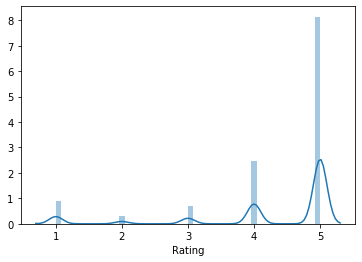

In [18]:
sns.distplot(df["Rating"])

As we can see the distribution we have more 5 labels than all other labes and here data is biased to the 5 and we have to make it even we need to use sampling to make them even 

lets start with sentiment analysis 
Sentiment analysis is the process of determining the writer’s attitude or opinion ranging from -1 (negative attitude) to 1 (positive attitude). We’ll be using the TextBlob library to analyze sentiment. TextBlob’s Sentiment() function requires a string but our “lemmatized” column is currently a list. Let’s convert the list into a string.

In [19]:
df1 = df[["Rating", "lemmatized"]]
df1.head()

,Rating,lemmatized
0,5,"[many, people, say, phone, battery, drain, iss..."
1,5,"[using, month, con, battery, good, great, neve..."
2,5,"[good, quality, good, performance, nice, camer..."
3,5,"[nice, phone, good, camera, good, battery, bac..."
4,5,"[beast, unleashed, update, battery, backup, te..."


In [20]:
#we will create a string using lemmatize words
df1['lemma_str'] = [' '.join(map(str,l)) for l in df1['lemmatized']]
df1.head()

,Rating,lemmatized,lemma_str
0,5,"[many, people, say, phone, battery, drain, iss...",many people say phone battery drain issue writ...
1,5,"[using, month, con, battery, good, great, neve...",using month con battery good great never felt ...
2,5,"[good, quality, good, performance, nice, camer...",good quality good performance nice camera batt...
3,5,"[nice, phone, good, camera, good, battery, bac...",nice phone good camera good battery backup tha...
4,5,"[beast, unleashed, update, battery, backup, te...",beast unleashed update battery backup tested n...


In [21]:
#lets perforn sentiment analysis
from textblob import TextBlob
df1['sentiment'] = df1['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1.head()

,Rating,lemmatized,lemma_str,sentiment
0,5,"[many, people, say, phone, battery, drain, iss...",many people say phone battery drain issue writ...,0.411000
1,5,"[using, month, con, battery, good, great, neve...",using month con battery good great never felt ...,0.413333
2,5,"[good, quality, good, performance, nice, camer...",good quality good performance nice camera batt...,0.616667
3,5,"[nice, phone, good, camera, good, battery, bac...",nice phone good camera good battery backup tha...,0.585714
4,5,"[beast, unleashed, update, battery, backup, te...",beast unleashed update battery backup tested n...,0.200000


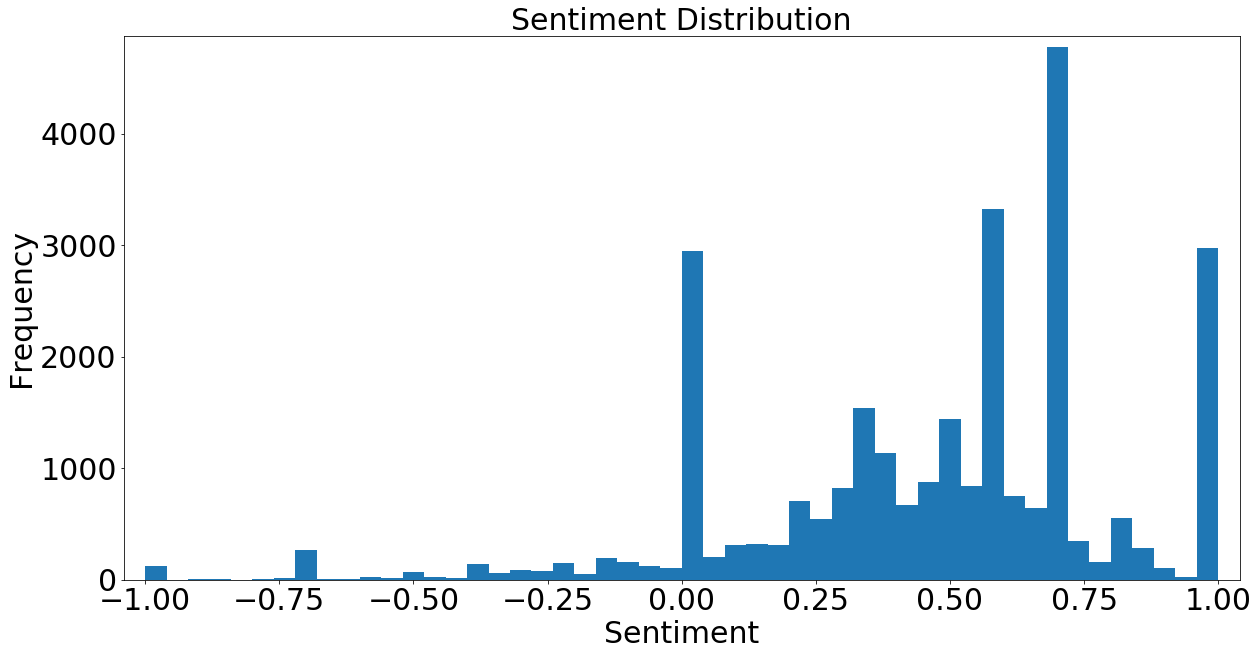

In [22]:
#plotting histogram for  
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.yticks(fontsize=30)
plt.hist(df1['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

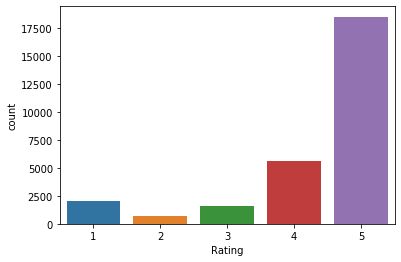

In [23]:
sns.countplot(df1["Rating"])

We need to apply resampling on the data as we can see we have more rating with label 5 and 1's are very less and rare if we create model with this data data withh be biased to a labels 5 and 4

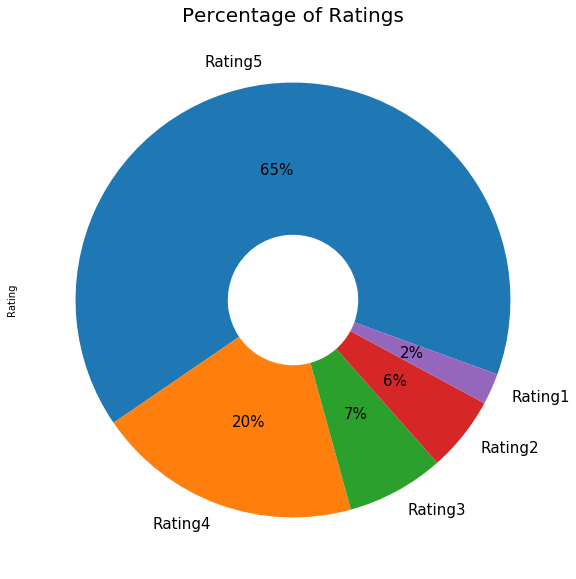

In [24]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df1.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

BY this we can say we have more 5 rating values we have to make even with resampling

In [25]:
df1['word_count'] = df1['lemmatized'].apply(lambda x: len(str(x).split()))
df1['review_len'] = df1['lemma_str'].astype(str).apply(len)
df1.head()

,Rating,lemmatized,lemma_str,sentiment,word_count,review_len
0,5,"[many, people, say, phone, battery, drain, iss...",many people say phone battery drain issue writ...,0.411000,55,361
1,5,"[using, month, con, battery, good, great, neve...",using month con battery good great never felt ...,0.413333,57,357
2,5,"[good, quality, good, performance, nice, camer...",good quality good performance nice camera batt...,0.616667,12,83
3,5,"[nice, phone, good, camera, good, battery, bac...",nice phone good camera good battery backup tha...,0.585714,31,200
4,5,"[beast, unleashed, update, battery, backup, te...",beast unleashed update battery backup tested n...,0.200000,46,314


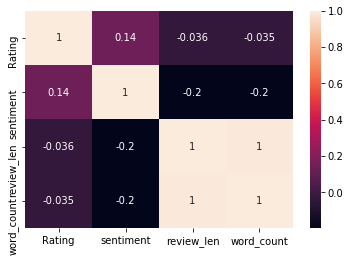

In [26]:
correlation = df1[['Rating','sentiment', 'review_len', 'word_count']].corr()
sns.heatmap(correlation, annot = True)

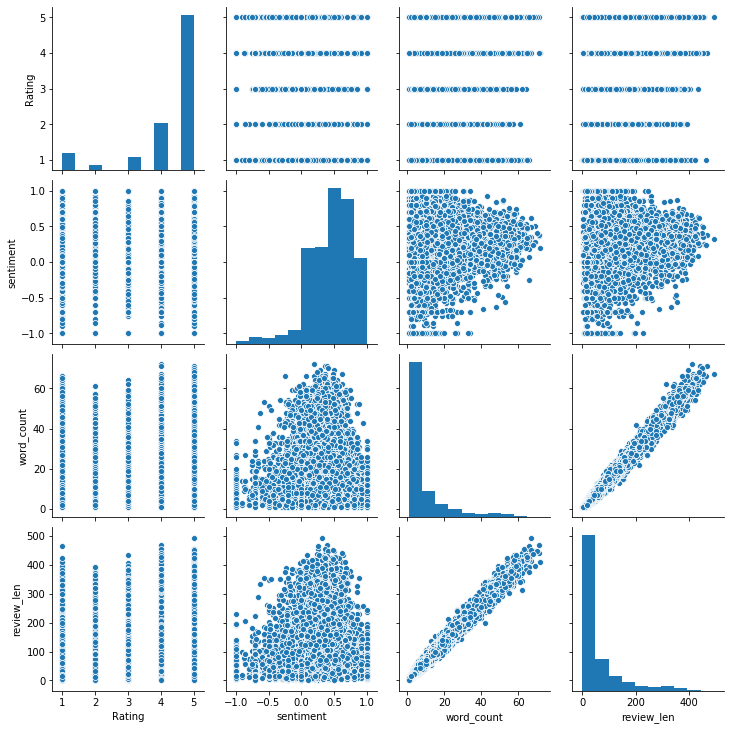

In [50]:
sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb3149a250>,
      dtype=object)

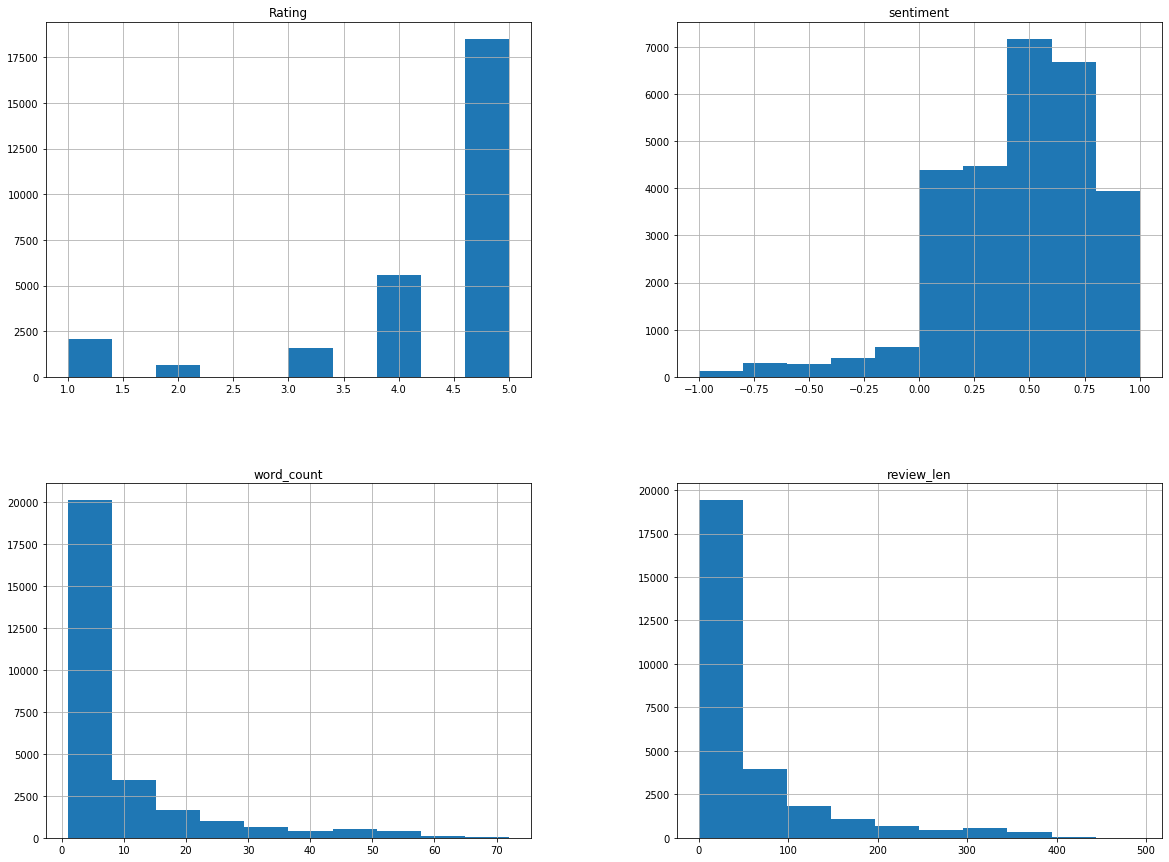

In [51]:
#plotting the hist bar of dataset
df1.hist(figsize=(20,15), sharex=False)

By seeing the plot we can say that we have slights skewed length of th data any way we are not going to use tham in the model we just created for exploratory purpose

In [27]:
#lets start with term frequenct where we can mentiom top 100 most common, more least words
from nltk.probability import FreqDist
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
    
print(allwords)

['many', 'people', 'say', 'phone', 'battery', 'drain', 'issue', 'writing', 'review', 'numbrweek', 'usage', 'face', 'battery', 'drainage', 'issue', 'took', 'daily', 'numbr', 'numbr', 'hr', 'online', 'meeting', 'continuously', 'lockdown', 'took', 'numbr', 'numbr', 'normal', 'numbr', 'charging', 'speed', 'fast', 'charge', 'numbr', 'numbr', 'le', 'numbrmins', 'numbr', 'camera', 'poco', 'xnumbr', 'awesome', 'numbrmp', 'sony', 'camera', 'good', 'numbr', 'performance', 'pubg', 'free', 'fire', 'awesome', 'high', 'graphic', 'gam', 'using', 'month', 'con', 'battery', 'good', 'great', 'never', 'felt', 'difference', 'numbr', 'numbr', 'hz', 'refresh', 'rate', 'normal', 'use', 'game', 'useful', 'phone', 'heavier', 'sidewhile', 'using', 'camera', 'long', 'duration', 'phone', 'heat', 'photo', 'saturated', 'use', 'g', 'cam', 'better', 'pro', 'really', 'good', 'looking', 'phone', 'feel', 'premium', 'superb', 'main', 'camera', 'senser', 'macro', 'cam', 'work', 'better', 'gcam', 'app', 'loading', 'fastui'

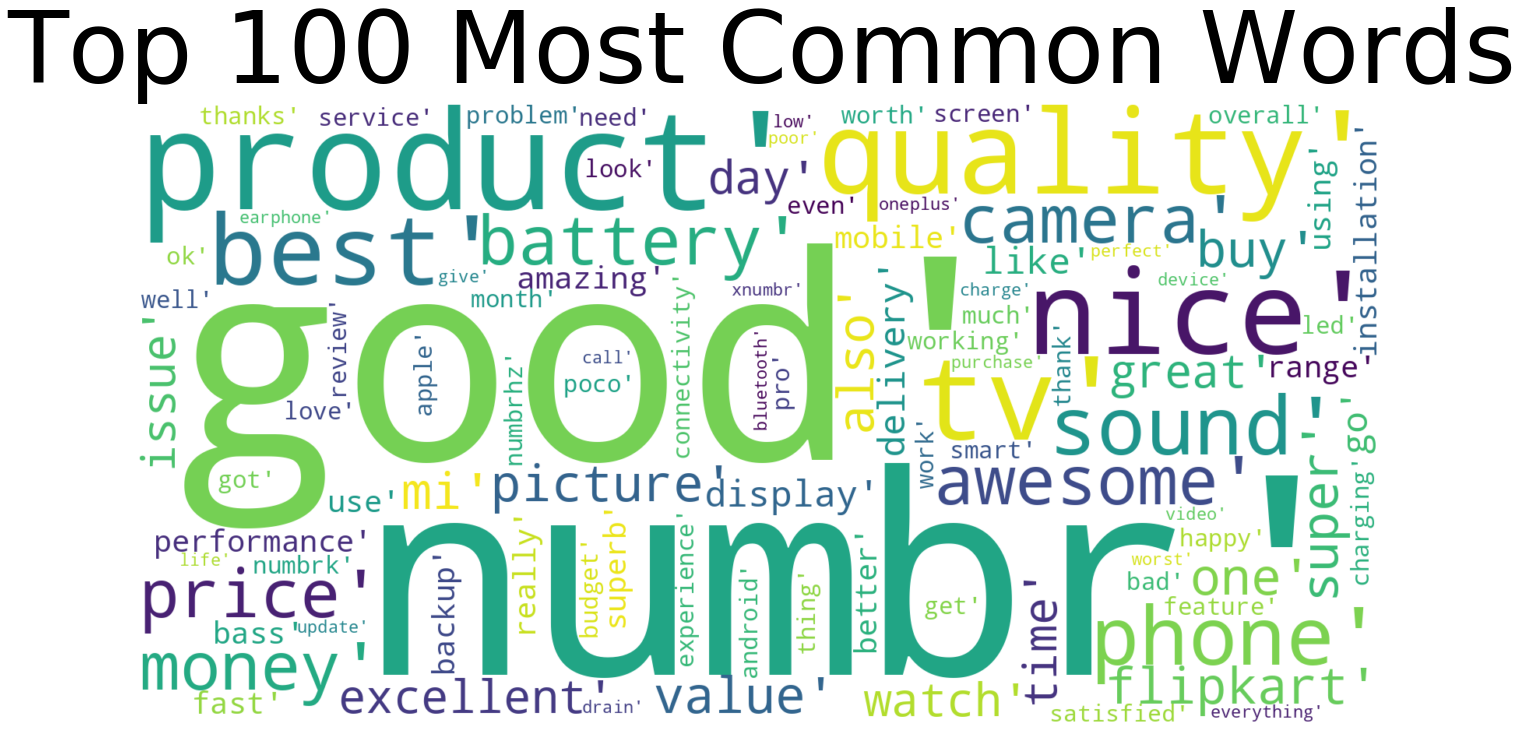

In [28]:
#We can see 100 common words in the data
from wordcloud import WordCloud
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

# Diving the dataset into test and train 

In [52]:
#importing all the libraries for model creation 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
seed = 7
import yellowbrick

In [30]:
#tfidf is nlp library which creates vectors used for the odel creation
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1,5), analyzer = 'char')

In [31]:
#splitiing test train dataset 
x = tfidf.fit_transform(df["Review"])
y = df["Rating"]

In [32]:
#Checking the shape of the data 
x.shape, y.shape

((28401, 5000), (28401,))

In [33]:
#dividing the data into ttest and train
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
#checking the shape of test and train dataset
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((22720, 5000), (22720,), (5681, 5000), (5681,))

# Model Creation

In [35]:
#creating the instances of the models
clf = LinearSVC()
mul = MultinomialNB()

In [36]:
#fitting training and predicting with the mode
model = [clf, mul]

for m in model:
    m.fit(x_train,y_train)
    y_pred = m.predict(x_test)
    print("Accuracy score of :",m,accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    print("*"*70)

Accuracy score of : LinearSVC() 0.6461890512233762
              precision    recall  f1-score   support

           1       0.14      0.01      0.01       380
           2       0.00      0.00      0.00       131
           3       0.16      0.02      0.03       313
           4       0.34      0.07      0.12      1145
           5       0.67      0.96      0.79      3712

    accuracy                           0.65      5681
   macro avg       0.26      0.21      0.19      5681
weighted avg       0.52      0.65      0.54      5681

**********************************************************************
Accuracy score of : MultinomialNB() 0.6247139588100686
              precision    recall  f1-score   support

           1       0.19      0.04      0.06       380
           2       0.00      0.00      0.00       131
           3       0.17      0.16      0.17       313
           4       0.34      0.16      0.22      1145
           5       0.69      0.89      0.78      3712

    accu

In [37]:
#we have already predicted now we are doing crossval score to select the best model
models = []
models.append(('mul', MultinomialNB()))
models.append(('SVC', LinearSVC()))



results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)

mul: 0.615449, 0.009538
SVC: 0.636928, 0.010925


As we can we we have two models that performs pretty bad and we will try to make it good using hyper parameter tuning here i am selecting the multinoialNB so lets staart with hyper parameter tuning lets check weather it will improve the accuracy or not 

# Hyper paramter tuning

In [38]:
#setting the parameters 
param_mul = {
    'alpha' : [0.1, 10, 20, 100, 200],
    'fit_prior' : [True, False]
    
    
}

In [39]:
#using Randomized CV for hyperparameter tuning
mul = RandomizedSearchCV(MultinomialNB(),param_mul, verbose=3, cv = 5,n_iter = 70, n_jobs = -1)

In [40]:
#Fitting the tuned model
mul.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=70, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 10, 20, 100, 200],
                                        'fit_prior': [True, False]},
                   verbose=3)

Accuracy score of : MultinomialNB() 0.6461890512233762
              precision    recall  f1-score   support

           1       0.14      0.01      0.01       380
           2       0.00      0.00      0.00       131
           3       0.16      0.02      0.03       313
           4       0.34      0.07      0.12      1145
           5       0.67      0.96      0.79      3712

    accuracy                           0.65      5681
   macro avg       0.26      0.21      0.19      5681
weighted avg       0.52      0.65      0.54      5681



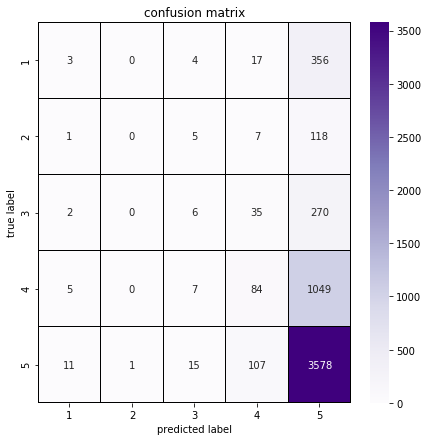

In [41]:
##predicted using tuned model
y_pred = clf.predict(x_test)
print("Accuracy score of :",m,accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
cm1 = confusion_matrix(y_test, y_pred)

x_labe = [1, 2, 3, 4, 5]
y_labe = [1, 2, 3, 4, 5]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm1, annot=True, linewidths=0.2, linecolor="black", fmt = ".0f", ax = ax, cmap="Purples", xticklabels=x_labe, yticklabels=y_labe)
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.show()

# Saving the model

In [42]:
import joblib

joblib.dump(mul, "nlpmodel1.pkl")


['nlpmodel1.pkl']

In [43]:
new_model = joblib.load("nlpmodel1.pkl")

In [44]:
new_model

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_iter=70, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 10, 20, 100, 200],
                                        'fit_prior': [True, False]},
                   verbose=3)

In [45]:
x = ["'everything thing excellent except battery backup gives almost numbr numbr hours day moderate usage single charge personally liked'"]
vec = tfidf.transform(x)

In [46]:
new_model.predict(vec)

array([5])

by the model prediction we can tell that data has been baised to the 5 rating.maily it happens in data collection maily in any e commerse sites when scraping the data we must have some misplaced values and many people gives us positive raating then negitive rating this is why we have 5 rating bias  